In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import openpyxl as ox

fast_ma_period = 10
slow_ma_period = 50
investment_amount = 1000
transaction_cost = 0.00  # 0.2%



In [7]:
data = yf.download('AAPL', start='2024-01-01', end='2026-01-01').drop(columns=['Open', 'High', 'Low', 'Volume'])
print(data)

[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            AAPL
Date                  
2024-01-02  183.903229
2024-01-03  182.526245
2024-01-04  180.208130
2024-01-05  179.484940
2024-01-08  183.823975
...                ...
2025-12-24  273.809998
2025-12-26  273.399994
2025-12-29  273.760010
2025-12-30  273.079987
2025-12-31  271.859985

[502 rows x 1 columns]


In [ ]:
data['fa_data'] = data['Close'].rolling(window=fast_ma_period).mean()
data['sa_data'] = data['Close'].rolling(window=slow_ma_period).mean()
data['signal'] = (data['fa_data'] > data['sa_data']).astype(int)
data['positions'] = data['signal'].shift(1)
data['market_returns'] = data['Close'].pct_change()
data['trade_flag'] = data['positions'].diff().abs()
data['strategy_returns'] = (data['market_returns'] * (data['positions'].shift(1))) - (data['trade_flag'] * transaction_cost)
data['cumulative_market_returns'] = ((1 + data['market_returns']).cumprod()) * investment_amount
data['cumulative_strategy_returns'] = ((1 + data['strategy_returns']).cumprod()) * investment_amount
data['max_drawdown'] = data['cumulative_strategy_returns'].cummax()

print(data.head(20))




Price            Close     fa_data sa_data signal positions market_returns  \
Ticker            AAPL                                                       
Date                                                                         
2024-01-02  183.903229         NaN     NaN      0       NaN            NaN   
2024-01-03  182.526245         NaN     NaN      0       0.0      -0.007488   
2024-01-04  180.208130         NaN     NaN      0       0.0      -0.012700   
2024-01-05  179.484940         NaN     NaN      0       0.0      -0.004013   
2024-01-08  183.823975         NaN     NaN      0       0.0       0.024175   
2024-01-09  183.407898         NaN     NaN      0       0.0      -0.002263   
2024-01-10  184.448074         NaN     NaN      0       0.0       0.005671   
2024-01-11  183.853683         NaN     NaN      0       0.0      -0.003223   
2024-01-12  184.180588         NaN     NaN      0       0.0       0.001778   
2024-01-16  181.912018  182.774878     NaN      0       0.0     

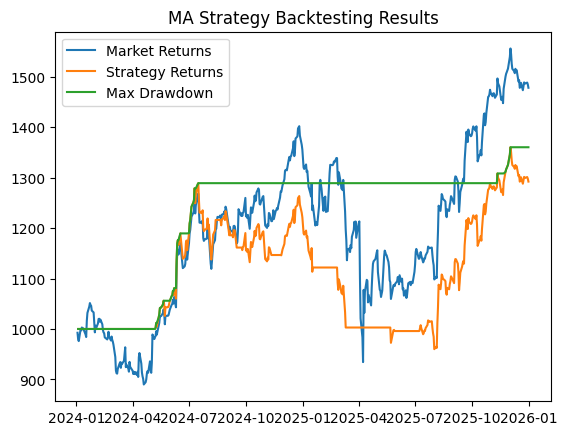

In [9]:
plt.plot(data.index, data['cumulative_market_returns'], label='Market Returns')
plt.plot(data.index, data['cumulative_strategy_returns'], label='Strategy Returns')
plt.plot(data.index, data['max_drawdown'], label='Max Drawdown')
plt.title('MA Strategy Backtesting Results')
plt.legend()
plt.show()

In [10]:
strategy_volatility = data['strategy_returns'].std() * np.sqrt(252)
strategy_sharpe_ratio = (data['strategy_returns'].mean() * 252) / strategy_volatility

market_volatility = data['market_returns'].std() * np.sqrt(252)
market_sharpe_ratio = (data['market_returns'].mean() * 252) / market_volatility

total_days = (data.index[-1] - data.index[0]).days
total_days_invested = data['positions'].sum()
total_days_not_invested = total_days - total_days_invested

strategy_return = (data['cumulative_strategy_returns'].iloc[-1] / investment_amount)*100
buy_and_hold_return = (data['cumulative_market_returns'].iloc[-1] / investment_amount)*100

number_of_trades = data['positions'].diff().abs().sum()


print(f"Number of Trades Executed: {number_of_trades}")

print(f"Strategy Total Return: {strategy_return:.2f}%")
print(f"Buy and Hold Total Return: {buy_and_hold_return:.2f}%")

print(f"Total Days Analyzed: {total_days}")
print(f"Total Days Invested: {total_days_invested}")
print(f"Total Days Not Invested: {total_days_not_invested}")

print(f"Strategy Volatility: {strategy_volatility:.4f}")
print(f"Strategy Sharpe Ratio: {strategy_sharpe_ratio:.4f}")
print(f"Market Volatility: {market_volatility:.4f}")
print(f"Market Sharpe Ratio: {market_sharpe_ratio:.4f}")

Number of Trades Executed: 13.0
Strategy Total Return: 129.23%
Buy and Hold Total Return: 147.83%
Total Days Analyzed: 729
Total Days Invested: 293.0
Total Days Not Invested: 436.0
Strategy Volatility: 0.1768
Strategy Sharpe Ratio: 0.8190
Market Volatility: 0.2789
Market Sharpe Ratio: 0.8429
